In [1]:
import networkx as nx
import random
import powerlaw
import matplotlib.pyplot as plt

In [2]:
# loads actor_costar.edges into a weighted networkx graph
G = nx.read_weighted_edgelist('data/actors_costar.edges')

# Basic statistics
def basic_statistics(G):
    print('Nodes in G:', G.number_of_nodes())
    print('Edges in G:', G.number_of_edges())
    print('Is G connected?', nx.is_connected(G))
    if not nx.is_connected(G):
        print('Number of connected components in G:', nx.number_connected_components(G))
        print('What is the size of the giant component?', len(max(nx.connected_components(G), key=len)))

basic_statistics(G)

Nodes in G: 252999
Edges in G: 1015187
Is G connected? True


In [3]:
ordered_edges = nx.bfs_edges(G, 'nm3431653')
print(next(ordered_edges))
print(next(ordered_edges))

('nm3431653', 'nm4955340')
('nm3431653', 'nm3431498')


In [4]:
def random_sample(G, N):
    sampled_nodes = random.sample(list(G.nodes()), N)
    return nx.subgraph(G, sampled_nodes)

def snowball_sample(G, N):
    root = random.choice(list(G.nodes()))
    ordered_edges = nx.bfs_edges(G, root)
    ordered_nodes = [root] + [v for _, v in ordered_edges]
    sampled_nodes = ordered_nodes[:N]
    return nx.subgraph(G,sampled_nodes)

In [5]:
G_random = random_sample(G, 1000)
G_snowball = snowball_sample(G, 1000)

print('Snowball sample:')
basic_statistics(G_snowball)
print('\nRandom sample:')
basic_statistics(G_random)

Snowball sample:
Nodes in G: 1000
Edges in G: 5233
Is G connected? True

Random sample:
Nodes in G: 1000
Edges in G: 22
Is G connected? False
Number of connected components in G: 978
What is the size of the giant component? 4


In [8]:
# compares density
print('Density of G: {:0.5f}'.format(nx.density(G)))
print('Density of G_snowball: {:0.5f} ({:0.1f} times the original)'.format(nx.density(G_snowball), nx.density(G_snowball)/nx.density(G)))
print('Density of G_random: {:0.5f} ({:0.1f} times the original)'.format(nx.density(G_random), nx.density(G_random)/nx.density(G)))

Density of G: 0.00003
Density of G_snowball: 0.01048 (330.3 times the original)
Density of G_random: 0.00004 (1.4 times the original)


In [44]:
# Compares APL
print('APL of G_snowball: {:0.2f}'.format(nx.average_shortest_path_length(G_snowball)))

GC_random = G_random.subgraph(max(nx.connected_components(G_random), key=len))
print('APL of GC_random: {:0.2f}'.format(nx.average_shortest_path_length(GC_random)))

APL of G_snowball: 3.04
APL of GC_random: 1.67


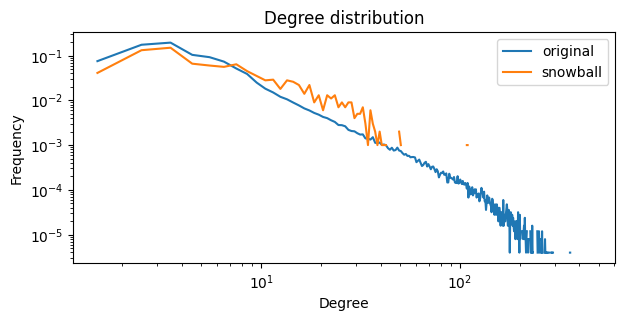

In [13]:
# plots degree distribution
fig = plt.figure(figsize=(7, 3))
powerlaw.plot_pdf([G.degree[node] for node in G.nodes], label='original', linear_bins=True)
powerlaw.plot_pdf([G_snowball.degree[node] for node in G_snowball.nodes], label='snowball', linear_bins=True)
plt.legend()
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency');